# Logistic Regression for Sentiment Analysis

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb


# 1.- Load Libraries

n this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

    AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively. For simplicity, I assembled the reviews in a single CSV file.

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from nltk.corpus import comparative_sentences
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.path

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

<module 'posixpath' from '/home/richard/home/anaconda3/lib/python3.6/posixpath.py'>

In [4]:
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


# 2.- Preprocessing Data Text

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

(-0.5, 399.5, 199.5, -0.5)

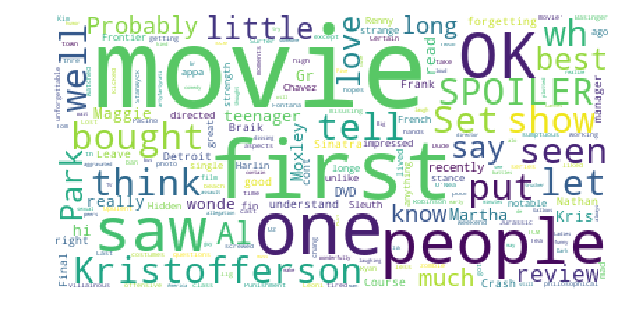

In [5]:
mpl.rcParams['figure.figsize']=(10.0,8.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']=20            #72 
mpl.rcParams['figure.subplot.bottom']=.1
stopwords = set(STOPWORDS)
wordcloud = WordCloud(    background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df.review))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [8]:
stop = stopwords.words('english')[17:]
porter = PorterStemmer()
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

In [9]:
words_no=['no','not']
words_pron=stopwords.words('english')[0:17]
print(words_pron)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves']


In [10]:
tokenizer(df.review[9])
stop

['movie',
 'directed',
 'renny',
 'harlin',
 'finnish',
 'miracle',
 'stallone',
 'gabe',
 'walker',
 'cat',
 'mouse',
 'mountains',
 'ruthless',
 'terrorists',
 'renny',
 'harlin',
 'knows',
 'direct',
 'actionmovie',
 'stallone',
 'needed',
 'role',
 'get',
 'back',
 'track',
 'snowy',
 'mountain',
 'good',
 'place',
 'action',
 'movie',
 'better',
 'direct',
 'movie',
 'snow',
 'ice',
 'cold',
 'bad',
 'weather',
 'finnish',
 'man',
 'action',
 'good',
 'music',
 'film',
 'spectacular',
 'bad',
 'guy',
 'john',
 'litghow',
 'stars',
 'micheal',
 'rooker',
 'portrait',
 'serialkiller',
 'janine',
 'turner',
 'strong',
 'medicine',
 'placed',
 'beautiful',
 'place',
 'exciting',
 'movie',
 'overall',
 'good',
 'movie',
 'remember',
 'extreme',
 'ääliöt',
 'special',
 'collectors',
 'edition',
 'good',
 'extras',
 'comig',
 'soon',
 'finland',
 'straight',
 'video']

['he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',

In [ ]:
lis_pos=[]
lis_neg=[]
lis_no=[]
lis_countp=[]
lis_exc=[]
lis_clogs=[]

def demo_excl(sentence,i): 
    word_excl = 0
    word_no = 0
    if "!" in temp.review[i] or "?" in temp.review[i]or "¿" in temp.review[i]:
        word_excl=1
    lis_exc.append(word_excl)

def demo_liu_hu_lexicon2(sentence):
    #tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    word_no = 0
    count_pro = 0
    count_logs = 0

    #tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]
    tokenized_sent=tokenizer(sentence)
    for word in tokenized_sent:
        #print(tokenized_sent)
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1
            #print(word)
        if word in words_no:
            word_no=1
        if word in words_pron:
            count_pro+=1
        count_logs+=1
    #print(pos_words)
    #print(neg_words)
    #print(word_no)
    #print(count_pro)
    #print(count_logs)
    lis_pos.append(pos_words)
    lis_neg.append(neg_words)
    lis_countp.append(count_pro)
    lis_clogs.append(np.log(count_logs))
    lis_no.append(word_no)
    #print(word_excl)
    '''
    if pos_words > neg_words:
        print("positive")
    elif pos_words < neg_words:
        print("negative")
    elif pos_words == neg_words:
        print("neutro")
    '''

this piece code ha a great computational time, but we going to run in other side

for i in range(40000):
    x=temp.review[i]
    demo_liu_hu_lexicon2(x)
    demo_excl(x,i)
    
temp2= pd.DataFrame()
temp2['num_pos']=lis_pos
temp2['num_neg']=lis_neg
temp2['exist_no']=lis_no
temp2['num_pronoums']=lis_countp
temp2['sig_excl']=lis_exc
temp2['num_logs']=lis_clogs
temp2['sentiment']=temp['sentiment']

temp2.tail()    
temp2[['num_pos', 'num_neg','exist_no','num_pronoums','sig_excl','num_logs','sentiment']].to_csv('movie_data.csv')

In [13]:
from numpy import genfromtxt
features = genfromtxt('carac.csv', delimiter=',')
target = genfromtxt('sentiment.csv', delimiter=',')
target = np.reshape(target,(target.shape[0],1))
features = np.column_stack((np.ones(features.shape[0]),features))

# 3.-Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
train_accuracy=[]
test_accuracy=[]
alpha=0.0000000001
theta=np.random.rand(1,X_train.shape[1])#/X_train.shape[0]
max_epoch=50000000
for epoch in range(max_epoch):
    hx_train=(1.0/(1.0+np.exp(-np.matmul(theta,np.transpose(X_train)))))
    error=np.transpose(y_train)-hx_train
    np.around(y_train)
    dtheta=np.matmul(error,X_train)
    theta+=alpha*dtheta#/X_train.shape[0]
    if epoch%10000==0:
        hx_test=(1.0/(1.0+np.exp(-np.matmul(theta,np.transpose(X_test)))))
        train_accuracy.append((X_train.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_train)-hx_train))))/X_train.shape[0])
        test_accuracy.append((X_test.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_test)-hx_test))))/X_test.shape[0])
        print ((X_train.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_train)-hx_train))))/X_train.shape[0],(X_test.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_test)-hx_test))))/X_test.shape[0])